In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Autoregressive Problem ##
$ x_n=w_nx_{n-1}+v_nx_{n-2}+\epsilon_n $

In [3]:
# Length of time series
N = 1500

# Gaussian random numbers as an excitation signal
np.random.seed(42)
ex = np.random.randn(N)

# Second order AR Process
a0 = np.array([1.2, -0.4])
A = np.zeros((N, 2))
alpha = 0.1

for n in range(N):
    A[n, 0] = a0[0] + alpha * np.cos(10 * np.pi * n / N)
    A[n, 1] = a0[1] + alpha * np.sin(6 * np.pi * n / N)

x = ex.copy()
for n in range(2, N):
    x[n] = np.array([x[n - 1], x[n - 2]]) @ A[n] + ex[n]

Text(0.5, 1.0, 'Coeffient $\\alpha_2$')

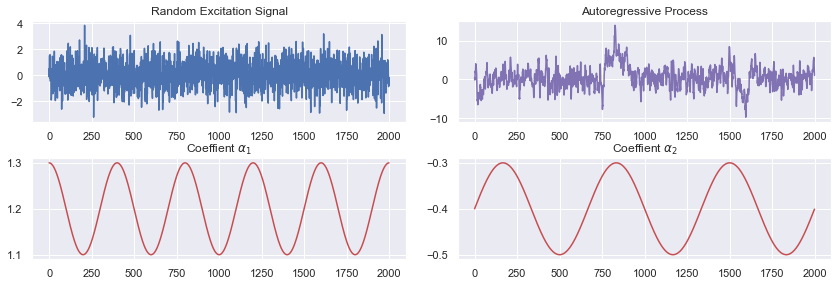

In [95]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))

plt.tight_layout()

ax[0][0].plot(range(N), ex)
ax[0][0].set_title("Random Excitation Signal")

ax[0][1].plot(range(N), x, color='m')
ax[0][1].set_title("Autoregressive Process")

ax[1][0].plot(A[:, 0], color='r')
ax[1][0].set_title(r"Coeffient $\alpha_1$")

ax[1][1].plot(A[:, 1], color='r')
ax[1][1].set_title(r"Coeffient $\alpha_2$")

# plt.savefig('figures/ap_data_varying.jpg')

In [50]:
# initialize
x0 = [0.01111731, 0.14907355]
P0 = 1.0

# x0 = [-1, 1]
# P0 = 10.0

# x0 = [-10, 10]
# P0 = 0.01

# x0 = [1.0, -0.2]
# P0 = 0.01

# x0 = [1.0, -0.2]
# P0 = 10.0

xh_n1_n1 = np.array(x0).reshape((-1, 1))
P_n1_n1 = P0 * np.eye(2)

# measurement noise
R = 1
# process noise
beta = 0.0001
Q = beta * np.eye(2)

x_history = np.zeros((N, 2))
x_history[0] = xh_n1_n1.T
x_history[1] = xh_n1_n1.T

In [51]:
for n in range(2, N):
    # prediction
    xh_n_n1 = xh_n1_n1
    P_n_n1 = P_n1_n1 + Q
    z_n = x[n].reshape(1, 1)

    # correction
    H = np.array([[x[n - 1], x[n - 2]]])
    k = P_n_n1 @ H.T / (H @ P_n_n1 @ H.T + R)  # (2, 1)
    xh_n_n = (np.eye(2) - k @ H) @ xh_n_n1 + k @ z_n
    P_n_n = (np.eye(2) - k @ H) @ P_n_n1

    x_history[n] = xh_n_n.T

    xh_n1_n1 = xh_n_n
    P_n1_n1 = P_n_n

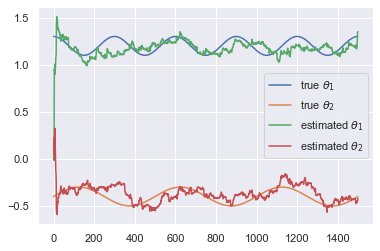

In [53]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

# ax[0].plot(x_history[:, 0], label=r'estimated $\alpha_1$')
# ax[0].set_xlim(0, N)
# # ax[0].set_ylim(0.0, 2.2)
# ax[0].plot(A[:, 0], color='r', label=r'true $\alpha_1$')
# ax[0].set_title("$x_0 = [%.1f,%.1f]^T$, $P_0 = %.3f I$" % (x0[0], x0[1], P0))
# ax[0].legend()

# ax[1].plot(x_history[:, 1], label=r'estimated $\alpha_2$')
# ax[1].set_xlim(0, N)
# # ax[1].set_ylim(-1.15, 0.35)
# ax[1].plot(A[:, 1], color='r', label=r'true $\alpha_2$')
# ax[1].set_title("$R = %.3f$, $Q = %.5f I$" % (R, beta))
# ax[1].legend()

# plt.savefig('figures/varying_result.jpg')

sns.lineplot(x=range(len(x_history)), y=A[:len(x_history), 0], label=r'true $\theta_1$')
sns.lineplot(x=range(len(x_history)), y=A[:len(x_history), 1], label=r'true $\theta_2$')
sns.lineplot(x=range(len(x_history)), y=x_history[:, 0], label=r'estimated $\theta_1$')
sns.lineplot(x=range(len(x_history)), y=x_history[:, 1], label=r'estimated $\theta_2$')

# plt.savefig('figures/ap_kalman_estimation.jpg')